### torch的基本使用

In [2]:
import torch


In [3]:
x=torch.tensor([[1,0,0],[1,0,0],[1,0,1],[1,1,1]],dtype=torch.float32)

In [4]:
x

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [5]:
x.shape

torch.Size([4, 3])

In [6]:
w=torch.tensor([-0.2,0.15,0.15])
w.shape

torch.Size([3])

### Linear的基本使用，记住两个参数即可

In [7]:
def LinearR(x,w):
    return torch.mv(x,w)
    return zhat

In [8]:
#
zhat=LinearR(x,w)
z=torch.tensor([-0.2,-0.05,-0.05,0.1],dtype=torch.float32)
z.shape
zhat

tensor([-0.2000, -0.2000, -0.0500,  0.1000])

In [9]:
z=torch.tensor([[-0.2],[-0.2],[-0.05],[0.1]])
z

tensor([[-0.2000],
        [-0.2000],
        [-0.0500],
        [ 0.1000]])

In [10]:
z==zhat

tensor([[ True,  True, False, False],
        [ True,  True, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [11]:
z=z.view(4)
z

tensor([-0.2000, -0.2000, -0.0500,  0.1000])

In [12]:
z==zhat

tensor([ True,  True, False, False])

In [13]:
SSE=sum((z-zhat)**2)
SSE

tensor(6.9389e-17)

In [14]:
#ones的使用
#这里表示
preds=torch.ones(300,69,33,23)*0.1
preds.shape

torch.Size([300, 69, 33, 23])

### allclose函数

In [15]:
a=torch.tensor([1,2,3,4],dtype=torch.float32)
b=torch.tensor([1.0000000000000000001,2,3,4,])
torch.allclose(a,b)

True

### 随机种子

In [16]:
import torch 
import torch.nn as nn
torch.random.manual_seed(2333)
X=torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
X.shape


torch.Size([4, 2])

In [17]:
output=nn.Linear(2,1)
zhat=output(X)
zhat

tensor([[0.6913],
        [0.8653],
        [0.8777],
        [1.0518]], grad_fn=<AddmmBackward0>)

In [18]:
import torch 
x=torch.tensor([0.6,0.7,0.3,0.3])
x>0.5

tensor([ True,  True, False, False])

### 列表生成式

In [19]:
tes=[int(t) for t in x>0.5]
tes

[1, 1, 0, 0]

### nn.functional

In [20]:
import torch
from torch.nn import functional as F
torch.manual_seed(2333)
X=torch. tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)

In [21]:
dense1=nn.Linear(2,1)
zhat=dense1(X)
print(zhat)
sigma=F.sigmoid(zhat)
sigma

tensor([[0.6913],
        [0.8653],
        [0.8777],
        [1.0518]], grad_fn=<AddmmBackward0>)


tensor([[0.6662],
        [0.7038],
        [0.7063],
        [0.7411]], grad_fn=<SigmoidBackward0>)

In [22]:
[int(x) for x in sigma>0.5]

[1, 1, 1, 1]

In [25]:
sigma
torch.sign(sigma)

tensor([[1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SignBackward0>)

In [27]:
F.relu(sigma)

tensor([[0.6662],
        [0.7038],
        [0.7063],
        [0.7411]], grad_fn=<ReluBackward0>)

#### 多分类

In [29]:
x=torch.tensor([0.6,0.7,0.3,0.3])
torch.softmax(x,dim=0)

tensor([0.2788, 0.3081, 0.2065, 0.2065])

In [33]:
x=torch.tensor([[[1,2,3,4],[3,4,4,5],[5,6,5,6]],[[5,6,5,6],[7,8,6,7],[9,10,5,6]]],dtype=torch.float32)
print(x.shape)
x

torch.Size([2, 3, 4])


tensor([[[ 1.,  2.,  3.,  4.],
         [ 3.,  4.,  4.,  5.],
         [ 5.,  6.,  5.,  6.]],

        [[ 5.,  6.,  5.,  6.],
         [ 7.,  8.,  6.,  7.],
         [ 9., 10.,  5.,  6.]]])

In [35]:
print(x.shape[0],x.shape[1],x.shape[2],x.shape[-1])

2 3 4 4


In [36]:
torch.softmax(x,dim=0)

tensor([[[0.0180, 0.0180, 0.1192, 0.1192],
         [0.0180, 0.0180, 0.1192, 0.1192],
         [0.0180, 0.0180, 0.5000, 0.5000]],

        [[0.9820, 0.9820, 0.8808, 0.8808],
         [0.9820, 0.9820, 0.8808, 0.8808],
         [0.9820, 0.9820, 0.5000, 0.5000]]])

#### cat()函数和view()函数


In [43]:
a=torch.tensor([1,1,1,1],dtype=torch.float32)
b=torch.tensor([2,2,2,2],dtype=torch.float32)
c=torch.tensor([3,3,3,3],dtype=torch.float32)
print(a,b,c,sep='\n')
print(torch.cat((a,b,c)))

tensor([1., 1., 1., 1.])
tensor([2., 2., 2., 2.])
tensor([3., 3., 3., 3.])
tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [52]:
x=torch.cat((a.view(1,4),b.view(1,4),c.view(1,4)))
print(x)
x=torch.cat((a.view(4,1),b.view(4,1),c.view(4,1)),dim=1)
x

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])


tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

#### 二分类损失

In [ ]:
import torch
import torch.nn as nn

import torch.nn.functional as F
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

torch.random.manual_seed(1)
m=300000
X=torch.rand((m,4),dtype=torch.float32,device='cuda')#这个是生成0-1之间的均匀分布
w=torch.randn((4,1),dtype=torch.float32,device='cuda')#这个生成[-3,3]的
y=torch.randint(low=0,high=2,size=(m,1),dtype=torch.float32,device='cuda')#左闭右开
#这里(m,1)表示每个样本最终对应一个标签,如果是多标签的话就是(m,2),
#比如说,一颗苹果既是水果又是植物

In [ ]:
#torch中mv表示metrix和vector相乘,mm表示metix和metix相乘
zhat=torch.mm(X,w)
sigma=torch.sigmoid(zhat)
re=[int(i) for i in sigma>0.5]
print(re)
# print(zhat)
print(sigma)

sigma.shape

In [24]:
criterion=nn.BCELoss()
loss=criterion(sigma,y)
print(loss)

tensor(1.0310, device='cuda:0')


In [25]:
criterion=nn.BCEWithLogitsLoss()
loss=criterion(zhat,y)
print(loss)

tensor(1.0310, device='cuda:0')


#### 多分类交叉熵损失

In [13]:
import torch
import torch.nn as nn

import torch.nn.functional as F
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

torch.random.manual_seed(1)
m=300000
X=torch.rand((m,4),dtype=torch.float32,device='cuda')#这个是生成0-1之间的均匀分布
w=torch.randn((4,3),dtype=torch.float32,device='cuda')#这个生成[-3,3]的
y=torch.randint(low=0,high=3,size=(m,),dtype=torch.float32,device='cuda')#左闭右开


#torch中mv表示metrix和vector相乘,mm表示metix和metix相乘
zhat=torch.mm(X,w)
# sigma=torch.sigmoid(zhat)
# print(zhat.shape)
# print(sigma.shape)

torch.Size([300000, 3])
torch.Size([300000, 3])


In [20]:
#NLLL Loss
logsm=nn.LogSoftmax(dim=1)
logsigma=logsm(zhat)
# print('经过softmax后的形状',logsigma.shape)
# print('经过softmax后的值',logsigma)

criterion=nn.NLLLoss()
print(y)
loss=criterion(logsigma,y.long())
print(loss)

tensor([0., 1., 2.,  ..., 1., 1., 2.], device='cuda:0')
tensor(1.2966, device='cuda:0')


In [24]:
criterion2=nn.CrossEntropyLoss()
loss=criterion2(zhat, y.long())
print(loss)

tensor(1.2966, device='cuda:0')


#### 反向传播

In [29]:
import torch
import torch.nn as nn
x=torch.tensor(1.,requires_grad=True)

y=x**2
y
torch.autograd.grad(y,x)

(tensor(2.),)

#### batch_size,dataset,DataLoader

In [33]:
import torch
from torch.utils.data import TensorDataset#用来合并数据集
from torch.utils.data import DataLoader#用来切割小批量

#建一个数据集,500个样本, 每个tensor2行3列
a=torch.randn(500,2,3)

b=torch.randn(500,3,4,5)

c=torch.randn(500,1)

#接下来将abc三个对象直接合并,,,合并的条件只有一个,那就是第一维度相等
data=TensorDataset(b,c)

bs=120
dataset=DataLoader(
    data,
    batch_size=bs,
    shuffle=True,#打乱数据
    drop_last=True,#是否删除最后一个Batch,一般设为False
    pin_memory=True,#如果用GPU训练,则这个设为True
    )
for i in dataset: 
    print(i[0].shape)

torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])


In [41]:
length=len(dataset)#告诉我们当前分成了几个batch
print("batch_size:",length)

N=len(dataset.dataset)#告诉当前有多少个样本
print('样本量:',N)

print('第一个样本的特征张量:',dataset.dataset[0][0])#表示第一个样本的特征张量
print('第一个样本的标签',dataset.dataset[0][1])#表示第一个样本的标签
print('batch_size,即每一个批次的大小',dataset.batch_size)

batch_size: 4
样本量: 500
第一个样本的特征张量: tensor([[[-1.5934,  0.7452, -0.3116,  1.4297, -0.2210],
         [ 0.6270, -1.3275,  0.8758,  0.0151, -0.2953],
         [-0.4051,  1.2169,  0.9025, -0.8736, -0.2740],
         [-2.1409,  1.1845, -0.1835, -1.4289, -0.8023]],

        [[-1.1896,  0.3341, -0.1841, -0.5048, -0.8671],
         [-0.7539,  0.3416, -0.5688, -0.3429,  0.4283],
         [ 0.6728, -0.7490, -0.3438, -0.5335,  0.0389],
         [-0.7901,  1.1206,  0.4565,  0.0180,  0.2131]],

        [[ 0.1621,  0.9041,  0.6083,  1.1701, -0.2720],
         [ 0.4942, -0.0688, -1.5727,  1.0009, -1.4261],
         [ 1.6200, -2.6805,  0.6616, -0.6709,  1.1145],
         [-1.0867, -1.2570,  0.2372, -0.6445,  0.5567]]])
第一个样本的标签 tensor([-0.0967])
batch_size,即每一个批次的大小 120


#### Mnist 数据集

图像的形状 torch.Size([1, 28, 28])


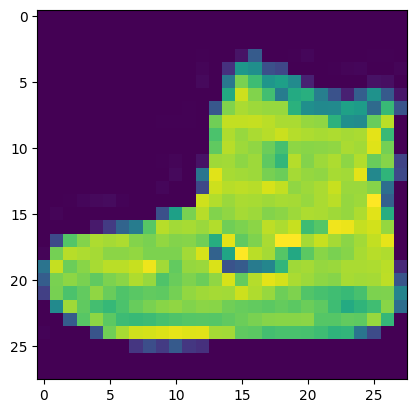

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision #包含数据的模块
import torchvision.transforms as transforms #用来处理数据的模块
import matplotlib.pyplot as plt
import numpy as np

#实例化数据
mnist=torchvision.datasets.FashionMNIST(
    root='../data', #数据存放位置
    train=True, #True则表示用训练集(很大),False则表示用测试集(小)
    download=True, #是否下载数据,,如果在给定的路径下找到了数据集,那就不会再下载了
    transform=transforms.ToTensor() #在数据集导入后进行统一的处理,都转化为torch能够处理的张量
)
def print_message():
    print('直接打印mnist')
    print(mnist)
    print('----')
    print('length,即样本数',len(mnist))
    '''
        对于图像数据集来讲,shape一般有四个维度
        sample_size:样本数
        H-height:图像高度
        W-width:图像宽度
        C-channel:图像通道数

        但是对于Mnist中的数据来讲,它是单通道的[60000,28,28],神经网络无法识别三维的,因此需要reshape一下
    '''
    print('----')
    print('shape:',mnist.data.shape)
    print('----')
    print('目标分类',mnist.targets.unique())
    print('----')
    print('打印分类类别的具体意义',mnist.classes)
def show_image():
    '''
        这里需要解释,plt是py的原生库,torch作为第三方库,它的tensor不能被plt识别
        因此需要先将tensor转化为numpy
    '''
    mnist[0]#中有两个元素,第一个是(转化为tensor的)图片,第二个是标签
    print('图像的形状',mnist[0][0].shape)
    plt.imshow(mnist[0][0].view(28,28).numpy())


if __name__=='__main__':
    # print_message()
    show_image()

#### 求acc

In [ ]:
import torch 
X=torch.tensor([[0.3,0.2,0.4],[0.1,0.7,0.2]])
y=torch.tensor([0,1])

print(torch.max(X,1))
print('预测标签为',torch.max(X,1)[1])
#算准确率这一步是对布尔张量求和,二者==得到的是一个布尔张量
acc=torch.sum(torch.max(X,1)[1]==y)/len(y)
print('准确率为',acc)

torch.return_types.max(
values=tensor([0.4000, 0.7000]),
indices=tensor([2, 1]))
预测标签为 tensor([2, 1])
准确率为 tensor(0.5000)
